### IMPORTS

In [1]:
import BBVI
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [2]:
# load data
data = torch.load('foong_data.pt')

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [197]:
import importlib
importlib.reload(BBVI)

<module 'BBVI' from 'C:\\Users\\cortax\\Documents\\BayesianNN\\Toy dataset - Foong\\BBVI_GPU_V1\\BBVI.py'>

In [198]:
Net = BBVI.VariationalNetwork(input_size=13, output_size=1, layer_width=3, nb_layers=3, device=device)

In [199]:
self = Net.linear1

In [200]:
x_data = data[0].to(device)
x_data = x_data.repeat(1,13)
x_data.size()

torch.Size([200, 13])

In [203]:
input = x_data

In [204]:
M=7

In [205]:
self.generate_rand(M)
self.reparameterization()

In [206]:
h1 = self.forward(input)
h1.size()

torch.Size([7, 200, 3])

In [213]:
input = h1

In [214]:
self = Net.linear2

In [215]:
self.generate_rand(M)
self.reparameterization()

In [216]:
h2 = self.forward(input)
h2.size()

torch.Size([7, 200, 3])

In [217]:
input = h2

In [218]:
self = Net.linear3

In [219]:
self.generate_rand(M)
self.reparameterization()

In [220]:
h3 = self.forward(input)
h3.size()

torch.Size([7, 200, 1])

In [85]:
optimizer = torch.optim.Adam
optimizer_params = {'lr':0.01}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.5}

In [86]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

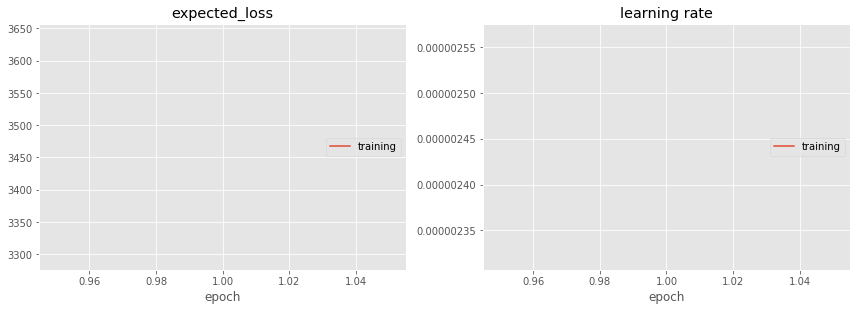

expected_loss:
training   (min: 3466.635, max: 3466.635, cur: 3466.635)

learning rate:
training   (min:    0.000, max:    0.000, cur:    0.000)


KeyboardInterrupt: 

In [88]:
model = voptimizer.run(data, n_epoch=100, n_iter=10, n_ELBO_samples=50, plot=True)

### TRAINING LOOP FOR DIFFERENT NUMBERS OF SAMPLING

In [ ]:
data = torch.load('foong_data.pt')
optimizer_params = [0.1, 3, 0.5]               # [learning_rate, patience, factor]
sigma_noise = 0.1
gpu = '1'
n_seed = 0

In [ ]:
for i in [1,5,10,20]:
    name = '_SamplingELBO_'+str(i)
    BBVI_trained = BBVI.BBVI(data=data, n_neurons=50, n_epoch=5, n_iter=10, n_samples_ELBO=i, sigma_noise=sigma_noise, 
              opti_params=optimizer_params, n_seed=n_seed, gpu=gpu, name=name);
    BBVI.plot_BBVI_Uncertainty(BBVI_trained, data, name, gpu);